In [ ]:
#imports
import pandas as pd
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let's us read the input data
#df = pd.read_csv('/content/drive/MyDrive/AI4gov_CPV/data_cpv/divisions.csv')
df = pd.read_csv('/content/drive/MyDrive/AI4Gov-cohort3/data_cpv/DataSet_MDProcurement.csv', sep=";")
# df = pd.read_csv('/content/drive/MyDrive/AI4gov_CPV/data_cpv/data-be-2020.csv', sep=";")
#df = pd.read_csv('/content/drive/MyDrive/AI4GOV-Cohort2/AI4gov_CPV/data_cpv/divisions.csv')

df


<ipython-input-5-ed31ef7dce3c>:3: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/AI4Gov-cohort3/data_cpv/DataSet_MDProcurement.csv', sep=";")


,Tender ID,Date,Lot id,Lot title,Expected value,Minimum bid amount for a lot,Awarded value,Procurement method used,Procurement method details,Tender status,Lot status,Procuring entity,Supplier,CPV classifications,Number of unique bidders,Number of disqualifications,Unit price,Days from tender close to award decision,Length of tender period (days)
0,https://mtender.gov.md/tenders/ocds-b3wdp1-MD-...,06.05.2023,18597c07-8007-4abb-9641-b6f61fa5e357,Lucrari de reparatii a acoperisului IP Liceul ...,"3.144.001.995,00",-,"0,00",Open,Open tender,Cancelled,Cancelled,"I.P.LICEUL TEORETIC LIVIU DELEANU,MUN.CHISINAU...",-,Lucrări de reparaţii generale şi de renovare -...,0,0,"0,00",-15,5
1,https://mtender.gov.md/tenders/ocds-b3wdp1-MD-...,15.05.2021,00d5e6e5-bd57-4aa1-a642-5eb6cac3662b,Blanchete cu tehnologii de personalizare pentr...,"498.356.865,92","168.057.708,45","0,00",Open,Open tender,Cancelled,Cancelled,I.P. AGENTIA SERVICII PUBLICE | 1002600024700,-,"Timbre, carnete de cecuri, bancnote, acţiuni, ...",3,3,"0,00",71,38
2,https://mtender.gov.md/tenders/ocds-b3wdp1-MD-...,26.01.2022,27e6da84-91a9-4c3c-aa2c-02bf0009fa11,Lotul nr. 1 Blanchete de acte de identitate d...,"394.905.000,00","130.477.483,02","130.477.483,02",Open,Open tender,Active,Active,I.P. AGENTIA SERVICII PUBLICE | 1002600024700,Polska Wytwórnia Papierów Wartościowych S.A. |...,"Timbre, carnete de cecuri, bancnote, acţiuni, ...",9,0,"41,23",27,33
3,https://mtender.gov.md/tenders/ocds-b3wdp1-MD-...,10.01.2023,eb3f9dbd-0dfe-45f8-a47f-08cddf5d2519,Servicii de furnizare a energiei electrice,"345.181.728,00",-,"0,00",Open,Open tender,Unsuccessful,Unsuccessful,Apă-Canal Chişinău | 1002600015876,-,Distribuţie de energie electrică şi servicii c...,0,0,"0,00",0,14
4,https://mtender.gov.md/tenders/ocds-b3wdp1-MD-...,10.05.2023,abc0580b-4c6a-4a7f-9ad1-6e4f465442fb,Lucrări de reparație a străzilor din or. Criuleni,"319.047.167,00",-,"0,00",Open,Open tender,Cancelled,Cancelled,Primaria Orasului Criuleni | 1007601009093,-,Lucrări de construcţii complete sau parţiale ş...,0,0,"0,00",-33,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255312,https://mtender.gov.md/tenders/ocds-b3wdp1-MD-...,29.11.2021,9474cab3-f7e2-4643-b065-624c1c45a208,Lot 51: Acid boric,"0,12","35,00","0,00",Open,Open tender,Active,Active,IMSP Spitalul Clinic Republican„Timofei Moșnea...,-,Echipamente medicale - 33100000-1,2,2,"0,00",46,10
255313,https://mtender.gov.md/tenders/ocds-b3wdp1-MD-...,29.11.2021,ae627499-5923-4412-8b34-49f69f69ae8d,Lot 51: Acid boric,"0,12",-,"0,00",Open,Open tender,Cancelled,Cancelled,IMSP Spitalul Clinic Republican„Timofei Moșnea...,-,Echipamente medicale - 33100000-1,0,0,"0,00",-20,9
255314,https://mtender.gov.md/tenders/ocds-b3wdp1-MD-...,10.01.2024,825501b2-3959-4443-bae1-807b08805b38,privind achiziționarea Produselor alimentare p...,"0,01",-,"0,00",Open,Micro value,Cancelled,Cancelled,I.M.S.P. SPITALUL RAIONAL VULCANESTI | 1003611...,-,Diverse produse alimentare - 15800000-6,0,0,"0,00",-8,6
255315,-,24.08.2021,-,-,-,-,"0,00",-,-,-,-,-,-,NaN,-,-,"0,00",-,-


In [ ]:
# Remove identificador and Tipo de contrato, which are not needed
# This is a little of data cleaning, but 'Tipo de contrato' (type of contract)
# could be used as an additional feature.
df = df[['Lot title','CPV classifications']]
#df = df.drop(['Identificador','Tipo de contrato'], axis = 1)
df.head()

,Lot title,CPV classifications
0,Lucrari de reparatii a acoperisului IP Liceul ...,Lucrări de reparaţii generale şi de renovare -...
1,Blanchete cu tehnologii de personalizare pentr...,"Timbre, carnete de cecuri, bancnote, acţiuni, ..."
2,Lotul nr. 1 Blanchete de acte de identitate d...,"Timbre, carnete de cecuri, bancnote, acţiuni, ..."
3,Servicii de furnizare a energiei electrice,Distribuţie de energie electrică şi servicii c...
4,Lucrări de reparație a străzilor din or. Criuleni,Lucrări de construcţii complete sau parţiale ş...


In [ ]:
# Let us explore the size of the data
df.count()

Lot title              255317
CPV classifications    255315
dtype: int64

In [ ]:
# All the data is clean. How many classes of CPV do we have in this dataset?
df.groupby(['CPV classifications']).count()


,Lot title
CPV classifications,
Absorbante igienice sau tampoane - 33771100-6,1
"Aburi, apă caldă şi produse conexe - 09320000-8",2
Acceleratoare grafice - 30237134-7,1
Accesorii de alimentare - 30237280-5,2
Accesorii de alimentare - 30237280-5; Accesorii informatice - 30237300-2; Memorie flash - 30234600-4,1
...,...
"Электричество, отопление, солнечная и ядерная энергия - 09300000-2",3
Электротехническое оборудование - 31730000-2,3
Юридические услуги - 79100000-5,1


In [ ]:
# Data is unbalanced! Let's try first a binary classifier for the category with
# most samples
df.groupby(['CPV classifications']).count().max()

Lot title    40225
dtype: int64

In [ ]:
# To print the category too:
series = df.groupby(['CPV classifications']).count().sort_values(by='Lot title', ascending=False)
series

,Lot title
CPV classifications,
Diverse produse alimentare - 15800000-6,40225
Echipamente medicale - 33100000-1,37930
Produse farmaceutice - 33600000-6,26531
Lucrări de construcţii complete sau parţiale şi lucrări publice - 45200000-9,6873
Materiale de construcţii şi articole conexe - 44100000-1,4825
...,...
"Divane - 39113200-9; Diverse tipuri de mobilier - 39151000-5; Mese - 39121200-8; Scaune, produse conexe şi piese ale acestora - 39110000-6",1
Divane - 39113200-9; Fotolii - 39113100-8,1
"Divane - 39113200-9; Fotolii - 39113100-8; Mese, dulapuri, birouri şi biblioteci - 39120000-9",1


In [ ]:
# Looking it in the table above, this corresponds to CPV 45000000,
# which is grouping construction work, site preparation work, etc.
# So we will turn all other CPVs into 'OTHER'
for ind, row in df.iterrows():
    if row['CPV classifications']!="Diverse produse alimentare - 15800000-6":
    #if row['CPV']!=79000000:
        df.at[ind,'CPV classifications'] = 0
df

,Lot title,CPV classifications
0,Lucrari de reparatii a acoperisului IP Liceul ...,0
1,Blanchete cu tehnologii de personalizare pentr...,0
2,Lotul nr. 1 Blanchete de acte de identitate d...,0
3,Servicii de furnizare a energiei electrice,0
4,Lucrări de reparație a străzilor din or. Criuleni,0
...,...,...
255312,Lot 51: Acid boric,0
255313,Lot 51: Acid boric,0
255314,privind achiziționarea Produselor alimentare p...,Diverse produse alimentare - 15800000-6
255315,-,0


In [ ]:
X = df['Lot title'].astype('string')
X

0         Lucrari de reparatii a acoperisului IP Liceul ...
1         Blanchete cu tehnologii de personalizare pentr...
2         Lotul nr. 1  Blanchete de acte de identitate d...
3                Servicii de furnizare a energiei electrice
4         Lucrări de reparație a străzilor din or. Criuleni
                                ...                        
255312                                   Lot 51: Acid boric
255313                                   Lot 51: Acid boric
255314    privind achiziționarea Produselor alimentare p...
255315                                                    -
255316                                                    -
Name: Lot title, Length: 255317, dtype: string

In [ ]:
Y = df['CPV classifications'].astype('string')
Y

0                                               0
1                                               0
2                                               0
3                                               0
4                                               0
                           ...                   
255312                                          0
255313                                          0
255314    Diverse produse alimentare - 15800000-6
255315                                          0
255316                                          0
Name: CPV classifications, Length: 255317, dtype: string

In [ ]:
df.dropna()
df.groupby(['CPV classifications']).count()

,Lot title
CPV classifications,
0,215092
Diverse produse alimentare - 15800000-6,40225


In [ ]:
# We apply an undersampler classifier in order to balance data.
# The undersampler will take elements from the majority class
# In this case, the majority class is "Other", so we are not
# removing any annotated labels.
# We have to be careful with random undersampling if there are
# categories with very little data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clf = Pipeline([
    ('vectorizer', CountVectorizer(analyzer="word",
                                    tokenizer=word_tokenize,
                                    max_features=None,
                                    lowercase=True)),
    ('undersample', RandomUnderSampler(sampling_strategy='majority')),
    ('linearsvc', LinearSVC(random_state=42))
])
clf.fit(X_train, y_train)
print(f' clf fit done')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


 clf fit done


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


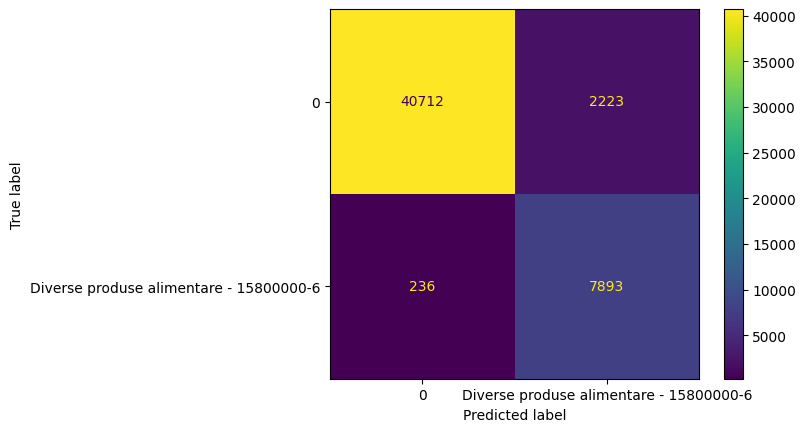

In [ ]:
#plot_confusion_matrix(clf, X_test, y_test)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

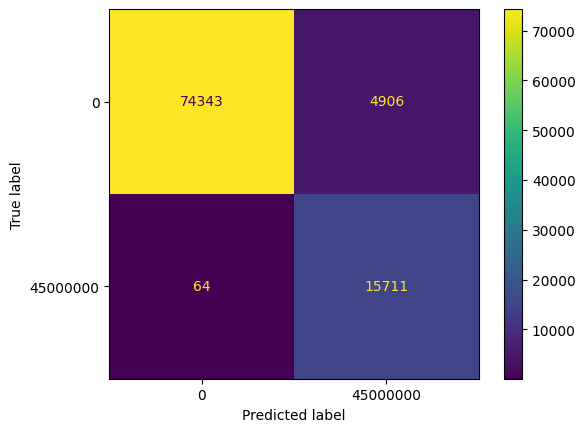

In [ ]:
# Let's plot the training error
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# Now let's see the evaluation results
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

                                         precision    recall  f1-score   support

                                      0       0.99      0.95      0.97     42935
Diverse produse alimentare - 15800000-6       0.78      0.97      0.87      8129

                               accuracy                           0.95     51064
                              macro avg       0.89      0.96      0.92     51064
                           weighted avg       0.96      0.95      0.95     51064



In [ ]:
# printing training error results
y_pred = clf.predict(X_train)
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     79249
    45000000       0.76      1.00      0.86     15775

    accuracy                           0.95     95024
   macro avg       0.88      0.97      0.92     95024
weighted avg       0.96      0.95      0.95     95024



In [ ]:
# Not bad; not perfect results.
# Why are there only 3917 in support if we had almost 20k?

# Ok, now let's see our classifier in practice:
test = clf.predict(["Obra de carretera",
    "Animales gatos y perros",
    "Servicio de recepción, apertura y cierre de puertas y ventanas",
                   "Alquiler en bar del paramo",
                   "Obras de metro y remodelación",
                   "Materiales de oficina",
                   "Grúas para demolición",
                   "Gruas para demolicion",
                   "Me comí un sandwich ayer",
                   "Aplicación informática de instalación de puertas"])
test

array([45000000,        0,        0,        0, 45000000,        0,
       45000000,        0,        0,        0])